[0.0, 2.5, 5.0, 7.5, 10.0, 12.5]


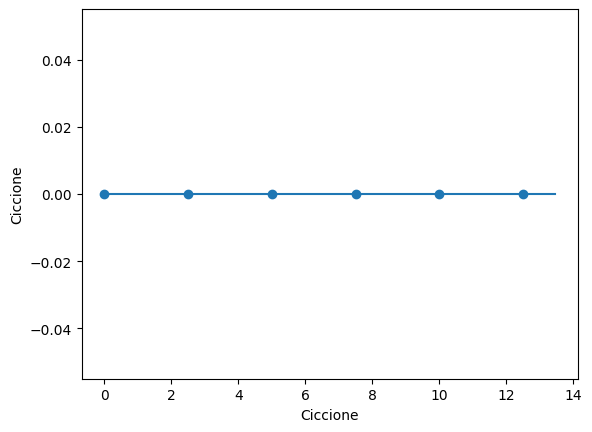

In [5]:
import matplotlib.pyplot as plt
from math import ceil, floor
import numpy as np


def predicter(x):

    def power_converter(value):

        if value >= 0:
            return float("1" + "0" * value)            
        else:
            return 1 / float("1" + "0" * -value)            


    min_ticks = 3
    max_ticks = 10
    nice_values = [1, 2, 2.5, 5, 10]
    
    all_combinations = []
    power_per_tick = []

    delta = x[-1] - x[0]    

    for n_ticks in range(min_ticks, max_ticks + 1):
        
        spacing = abs(delta / n_ticks)

        run = 1
        power = 0

        while run:
            if spacing * power_converter(power) // nice_values[0] <= 1:
                power += 1
            elif spacing * power_converter(power) // nice_values[-1] >= 1:
                power -= 1

            if spacing * power_converter(power) // nice_values[0] >= 1 and spacing * power_converter(power) // nice_values[-1] <= 1:
                run = 0
            
        
        all_combinations.append([abs(spacing * power_converter(power) - value) for value in nice_values])
        power_per_tick.append(power_converter(-power))
        
    best_from_tick = []
    for single_tick in all_combinations:
        best_from_tick.append([min(single_tick), single_tick.index(min(single_tick))])

    minimo = np.inf
    indice_valore = 0
    indice_tick = 0

    
    for index, contendente in enumerate(best_from_tick):
        
        if contendente[0] <= minimo:
            minimo = contendente[0]
            indice_valore = contendente[1]
            indice_tick = index


    new_start = round(x[0] / (nice_values[indice_valore] * power_per_tick[indice_tick])) * (nice_values[indice_valore] * power_per_tick[indice_tick])
    
    ris = [round(new_start + nice_values[indice_valore] * power_per_tick[indice_tick] * i, 3) for i in range(0, indice_tick + min_ticks + 1)]
        
    # decido se tenere l'ultimo elemento
    while abs(x[-1] - ris[-1]) > abs(x[-1] - ris[-2]):
        ris.pop()

    print(ris)
    return ris



x = [-0.0100452340500, 13.454873]
y = [0, 0]

plt.plot(x, y)
plt.xlabel("Ciccione")
plt.ylabel("Ciccione")

new_x = predicter(x)

plt.scatter(new_x, [0 for _ in range(len(new_x))])
plt.show()


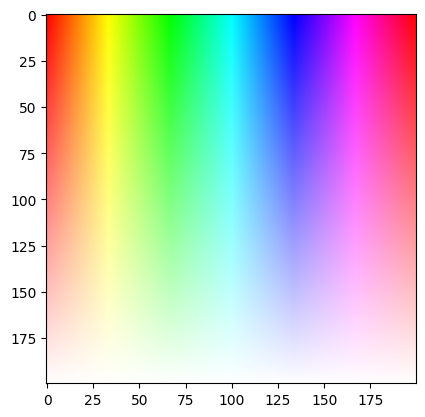

In [6]:
import matplotlib.pyplot as plt
import numpy as np

w, h = 200, 200 # resolution
mat = np.zeros((w, h, 3))

def interpolation(value):
    # 100 -> 110 -> 010 -> 011 -> 001 -> 101 -> 100
    #  0  ->  1  ->  2  ->  3  ->  4  ->  5  ->  6
    normalization_factor = 1 / 6
    index = value // normalization_factor
    inner_interpolation = (value % normalization_factor) / (1/6)

    def interpolate(x1, y1, z1, x2, y2, z2, value):
        
        if value == 0:
            x = x1
            y = y1
            z = z1
        else:
            x = x1 + (x2 - x1) * value
            y = y1 + (y2 - y1) * value
            z = z1 + (z2 - z1) * value

        return np.array([x, y, z])

    if index == 0:
        return interpolate(1, 0, 0, 1, 1, 0, inner_interpolation)
    elif index == 1:
        return interpolate(1, 1, 0, 0, 1, 0, inner_interpolation)
    elif index == 2:
        return interpolate(0, 1, 0, 0, 1, 1, inner_interpolation)
    elif index == 3:
        return interpolate(0, 1, 1, 0, 0, 1, inner_interpolation)
    elif index == 4:
        return interpolate(0, 0, 1, 1, 0, 1, inner_interpolation)
    elif index == 5:
        return interpolate(1, 0, 1, 1, 0, 0, inner_interpolation)
    elif index == 6:
        return np.array([1, 0, 0])

for x in range(w):
    # controls Hue
    mat[:, x, :] = interpolation(x / w) 

for y in range(h):
    # controls Saturation
    mat[y, :, :] *= 1 - (y / w)
    mat[y, :, :] += (y / w)

# controls Intensity
mat[:, :, :] *= 1

plt.imshow(mat)
plt.show()

In [9]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 4, 8, 16, 32, 64])

gradiente = np.gradient(y)

print(gradiente)

ris = np.vstack((x, gradiente))

print(ris.transpose(1, 0))

[ 1.   1.5  3.   6.  12.  24.  32. ]
[[ 1.   1. ]
 [ 2.   1.5]
 [ 3.   3. ]
 [ 4.   6. ]
 [ 5.  12. ]
 [ 6.  24. ]
 [ 7.  32. ]]


C:\Users\aless\AppData\Local\Temp\ipykernel_4008\1129963131.py:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(x*b + c) + d


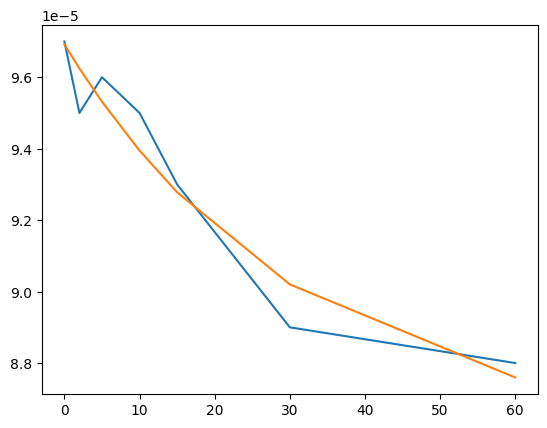

Interpolazione esponenziale del grafico -> Coefficiente: -0.03156549823724437
------------------------------------------------------------------------------------------------


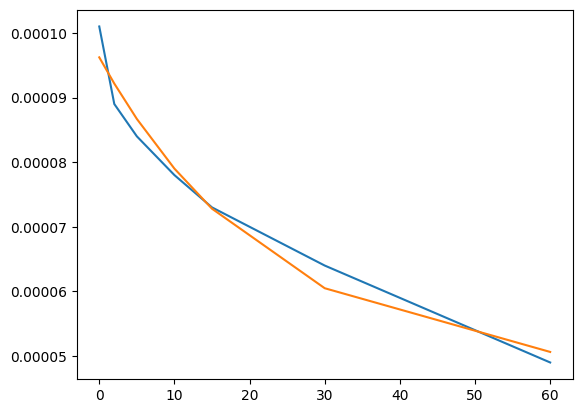

Interpolazione esponenziale del grafico -> Coefficiente: -0.04291642964107114
------------------------------------------------------------------------------------------------


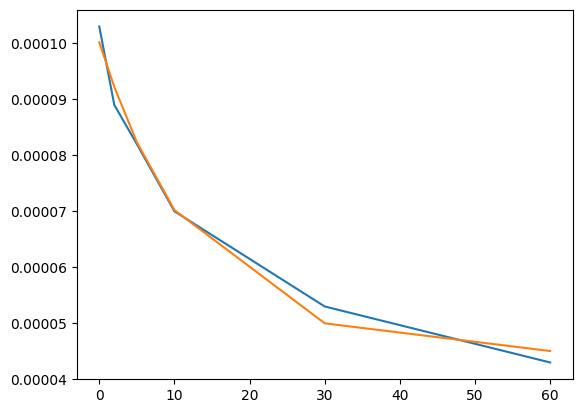

Interpolazione esponenziale del grafico -> Coefficiente: -0.07724381288662938
------------------------------------------------------------------------------------------------


In [106]:
# interpolazione esponenziale

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def customfoo_interpolation(x, y) -> str:
    
    def expo(x, a, b, c, d):
        return a * np.exp(x*b + c) + d

    initial_guess_gauss = [0.00001, -0.2, 0, 0.000087]

    try:
        params_gaus, _ = curve_fit(expo, x, y, p0=initial_guess_gauss)
        console_output = f"Interpolazione esponenziale del grafico -> Coefficiente: {params_gaus[1]}\n------------------------------------------------------------------------------------------------"
    except:
        ...

    y_i = expo(x, *initial_guess_gauss)
    obtained = expo(x, *params_gaus)


    plt.plot(x, y, x, obtained)
    plt.show()     

    return console_output



x = np.array([0, 2, 5, 10, 15, 30, 60])
y_biobr = np.array([0.000097, 0.000095, 0.000096, 0.000095, 0.000093, 0.000089, 0.000088])
y_biobrtio2 = np.array([ 0.000101, 0.000089, 0.000084, 0.000078, 0.000073, 0.000064, 0.000049])
x_p25 = np.array([0, 2, 5, 10, 30, 60])
y_p25 = np.array([ 0.000103, 0.000089, 0.000082, 0.000070, 0.000053, 0.000043])



print(customfoo_interpolation(x, y_biobr))
print(customfoo_interpolation(x, y_biobrtio2))
print(customfoo_interpolation(x_p25, y_p25))

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_curve(x, y, curve_str, initial_guess):
    # Dynamically create the curve function using eval
    curve_func = eval(f"lambda x, *p: {curve_str}")
    
    if len(x) < len(initial_guess):
        return f"Punti insufficienti.\nNumero parametri: {len(initial_guess)}\nPunti minimi richiesti: {len(initial_guess) + 1}\nPunti presenti nel grafico: {len(x)}"
    
    # Fit the curve
    params, covariance = curve_fit(curve_func, x, y, p0=initial_guess)
    return params, covariance


curve_str = "p[0] * np.sin(x * p[1] + p[2]) + p[3]"
initial_guess = [4, 1.2, 2, 0]  # Amplitude, mean, stddev


len_initial_guess = curve_str.count("p[")
print(len_initial_guess)

x = [0, 1, 2, 3, 4]
y = [1, 0, -1, 0, 1]

params, covariance = fit_curve(x, y, curve_str, initial_guess)

4
